In [108]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
%matplotlib inline

#### GOALS :- Code logistic regression(Binary Classification) using a public dataset (Malignant or Benign Tumor )without using sklearn


### This following implements a logistic regression model for binary classification entirely from scratch using Python and NumPy. It demonstrates the core concepts of logistic regression, including the sigmoid function, cost function (negative log-likelihood), and gradient descent for optimization

### Custom train_test split method to split the data 

In [109]:

def train_test_split(X,y,test_size = 0.2,random_state = None):
    
    if random_state:
        np.random.seed(random_state)
    m_examples = X.shape[0]
    indices = np.arange(m_examples)
    np.random.shuffle(indices)
    
    split_index = int(m_examples*(1-test_size))  #80% of the data
    train_indices = indices[:split_index]
    test_indices = indices[split_index:]
    X_train , X_test = X[train_indices],X[test_indices]
    y_train , y_test = y[train_indices] , y[test_indices]
    
    return X_train , X_test, y_train,y_test


    

## Logistic Regression Model class

In [110]:
class LogisticRegression:
    
    
    
    def __init__(self,alpha=0.01,iters=100000,verbose = False):
        """
        alpha is the learning rate for our gardient descent method
        iters is number of iterations for gradient descent 
        verbose if true will print cost after evry 1000 iterations
        
        """
        self.alpha = alpha
        self.iters = iters
        self.verbose = verbose
        self.theta = None
        self.bias = None
        self.costs = []

        
    def _sigmoid_func(self,z):
        z = np.clip(z,-500,500)
        g_z = 1/(1+np.exp(-z)) ##Sigmoid Function
        return g_z
    
    def _intialise_params(self,n_features):
        self.theta = np.zeros(n_features)
        self.bias = 0
        
    def fit(self,X,y):
        m_examples,n_features = X.shape
        self._intialise_params(n_features)
        for i in range(self.iters):
            theta_tx = np.dot(X,self.theta)+self.bias # calculate theta transpose x 
            y_predicted = self._sigmoid_func(theta_tx)#apply sigmoid function
            cost = -(1/m_examples)*np.sum(y*np.log(y_predicted)+(1-y)*np.log(1-y_predicted)) #calculate -log likelihood 
            self.costs.append(cost)
            #calculate the partial derivatives for weights and biases:
            
            dtheta = (1/m_examples)*np.dot(X.T,(y_predicted-y)) 
            db = (1/m_examples)*np.sum(y_predicted-y)
            
            #Apply Gradient Descent to find the best fit for theta and biases
            
            self.theta = self.theta - self.alpha*dtheta
            self.bias = self.bias - self.alpha*db
            
            if self.verbose and i%1000==0:
                print(f"Cost after iteration {i}: {cost}")
                
    def predict(self,X):
        #Calulate theta(transpose).X + bias
        theta_tx = np.dot(X,self.theta)+self.bias
        
        #Calucate the prediction using sigmoid function:
        
        y_predicted = self._sigmoid_func(theta_tx)
        #Create an array of predicted values based on the decision boundary:-
        
        y_predicted_cls = [1 if x > 0.5 else 0 for x in y_predicted] #The predicted class labels (0 or 1)
        return np.array(y_predicted_cls)

### Load the dataset

In [111]:
data = load_breast_cancer()
X = data.data
y = data.target

## Feature Scaling (Mean Normalisation)

In [112]:
X = (X-np.mean(X,axis=0))/np.std(X,axis=0)

### Train , Test split using our custom method

In [113]:
X_train , X_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)


## Training the model

In [114]:
print('.........Training the model.......')
model = LogisticRegression(alpha=0.01,iters=2000,verbose = True)
model.fit(X_train,y_train)
print('\n')
print('Model training complete')

.........Training the model.......
Cost after iteration 0: 0.6931471805599453
Cost after iteration 1000: 0.09596465117339478


Model training complete


## Evaluating the model

#### Make Predictions

In [115]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

### Calculating accuracy

In [116]:
def accuracy(true,pred):
    ac = np.sum(true==pred)/len(true)
    return ac

In [117]:
train_set_accuracy = accuracy(y_train,y_pred_train)
test_set_accuracy = accuracy(y_test,y_pred_test)

In [118]:
print("\n--- Model Evaluation ---")
print(f"Training Accuracy: {train_set_accuracy:.4f}")
print(f"Test Accuracy: {test_set_accuracy:.4f}")
print("----------------------\n")


--- Model Evaluation ---
Training Accuracy: 0.9890
Test Accuracy: 0.9649
----------------------



## Ploting the Cost Function(log likelihood)

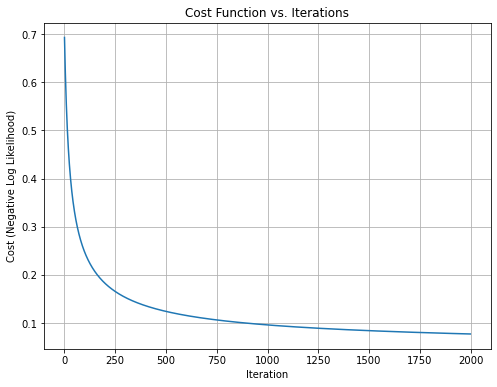

In [99]:
plt.figure(figsize=(8,6))
plt.plot(model.costs)
plt.xlabel("Iteration")
plt.ylabel("Cost (Negative Log Likelihood)")
plt.title("Cost Function vs. Iterations")
plt.grid(True)
plt.show()

## New Prediction

In [102]:
feature = X_test[10]
label = y_test[10]
pred = model.predict(feature.reshape(1,-1))[0]

In [107]:
print('....Example Prediction.....\n')
print(f"features:{feature}\n")
print(f"Actual label:{'Malignant' if label==1 else 'Benign'}\n")
print(f"Predicted Label: {'Malignant' if pred == 1 else 'Benign'}")

....Example Prediction.....

features:[ 1.18794852  0.30027345  1.18755329  1.12942414  0.7429472   0.38772862
  0.85500212  1.17596969  0.17663765 -0.48022895  0.50430749 -0.53405834
  0.17422146  0.59455046 -0.28833799 -0.37491479 -0.09163661 -0.21673435
 -0.59961692 -0.40469257  1.15775912  0.08513096  1.04068107  1.0765754
  0.73781968 -0.00423061  0.49755844  0.55415339  0.28027125 -0.29458036]

Actual label:Benign

Predicted Label: Benign


## Conclusion

In [119]:
train_set_accuracy = accuracy(y_train,y_pred_train)
test_set_accuracy = accuracy(y_test,y_pred_test)
print("\n--- Model Evaluation ---")
print(f"Training Accuracy: {train_set_accuracy:.4f}")
print(f"Test Accuracy: {test_set_accuracy:.4f}")
print("----------------------\n")


--- Model Evaluation ---
Training Accuracy: 0.9890
Test Accuracy: 0.9649
----------------------



### Achieved accuracy on Train Set 98.9% and Achieved accuarcy on test set is 96.49%